###  Regresión y regresión

# Plan
* Pasar y extensión py
* Abrir en spider
* Acumular resultados
* Cargar en power bi
* Dormir

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
conGraficos=True

# Funciones

In [4]:
def hm_corr_graf(corr_matrix_V2, cat):
    aux=pd.pivot_table(corr_matrix_V2,columns=['variable_2'],index=['variable_1'],values=['r'])
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    sns.heatmap(
        aux,
        annot     = True,
        cbar      = False,
        annot_kws = {"size": 10},
        vmin      = -0.5,
        vmax      = 0.5,
        center    = 0,
        cmap      = sns.diverging_palette(20, 220, n=200),
        square    = True,
        ax        = ax
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation = 45,
        horizontalalignment = 'right',
    )
    ax.tick_params(labelsize = 10)
    ax.set_title(cat)

In [5]:
# para ver el grado de correlación entre las variables disponibles.
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

In [6]:
def dic_corr_ind(data):
    corr_matrix = data.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    #res_corr_total_var_nacional=corr_tab_bajas[corr_tab_bajas['variable_1'].isin(sel_variables_razones)]
    res_corr_total_raz_nacional=corr_tab_bajas[corr_tab_bajas['variable_1'].isin(sel_variables_causas2)]
    #res_corr_total_var_nacional.drop(columns=['abs_r'],inplace=True)
    res_corr_total_raz_nacional.drop(columns=['abs_r'],inplace=True)
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    
    res_corr_total_raz_nacional=res_corr_total_raz_nacional.sort_values('variable_1')
    
    #return res_corr_total_raz_nacional, res_corr_total_var_nacional, corr_tab_razones
    return res_corr_total_raz_nacional

In [7]:
def dic_corr_mes_ind(data):
    #res_corr_total_var=res_corr_total_var_nacional
    res_corr_total_raz=res_corr_total_raz_nacional
    dic_resultados={}
    
    for i in range(1,12):
        print(i)
        dic_aux={}
        data_aux=data[data['FECHA']==i]    
        corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
        corr_tab=tidy_corr_matrix(corr_matrix)
        corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
        #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]    
        dic_aux['total']=corr_tab_bajas    
        #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
        #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
        #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
        #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
        #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]    
        #dic_aux['razones']=corr_tab_razones
        dic_resultados[i]=dic_aux

    for i in range(1,12):
        print(i)
        #aux_tab_var=dic_resultados[i]['total'][dic_resultados[i]['total']['variable_1'].isin(sel_variables_razones)]
        aux_tab_sel=dic_resultados[i]['total'][dic_resultados[i]['total']['variable_1'].isin(sel_variables_causas2)]
        #aux_tab_var.drop(columns=['abs_r'],inplace=True)
        aux_tab_sel.drop(columns=['abs_r'],inplace=True)
        #aux_tab_var.columns=['variable_1',str(i)+'_r']
        ###aux_tab_sel.columns=['variable_1',str(i)+'_r']    
        aux_tab_sel.columns=['variable_1',i]
        #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
        res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')
    
    res_corr_total_raz_T=res_corr_total_raz.T
    res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
    res_corr_total_raz_T = res_corr_total_raz_T.iloc[2:]   
    
    #res_corr_total_var_T=res_corr_total_var.T
    #res_corr_total_var_T.columns = res_corr_total_var_T.iloc[0]
    #res_corr_total_var_T = res_corr_total_var_T.iloc[1:]
    
    #return res_corr_total_raz_T, res_corr_total_var_T
    return res_corr_total_raz_T

In [8]:
def iter_regresion_VIF(data_reg):    
    i=0
    flag=1
    variables_eliminar=['ind_churn','FECHA']
    y_train = data_reg['ind_churn']    
   
    while flag>0:
        i=i+1
        print(i)
        data_reg=data_reg.drop(columns=variables_eliminar)
        # Dividir en X y X       
        X_train =  data_reg
        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()
        #lr_1.summary()
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        #vif
        df_coef=lr_1.params.to_frame()
        df_coef.columns=['coefs']
        df_p_values=lr_1.pvalues.to_frame()
        df_p_values.columns=['pvalues'] 
        
        df_revision=df_coef.merge(df_p_values, left_index=True, right_index=True)
        df_revision=df_revision.merge(vif, left_index=True, right_on=['Features'])
        print(df_revision)
        fila_problema=df_revision.sort_values(['pvalues'],ascending=False).head(1)
        print(fila_problema)
        if fila_problema['pvalues'].values[0]>0.05 :
            variables_eliminar=fila_problema['Features']
        else:
            fila_problema=df_revision.sort_values(['VIF'],ascending=False).head(1)
            if fila_problema['VIF'].values[0]>20 :
                variables_eliminar=fila_problema['Features']
            else:
                flag=0 
                
    return df_revision

In [9]:
def iter_regresion(data_reg):    
    i=0
    flag=1
    variables_eliminar=['ind_churn','FECHA']
    y_train = data_reg['ind_churn']    
   
    while flag>0:
        i=i+1
        print(i)
        data_reg=data_reg.drop(columns=variables_eliminar)
        # Dividir en X y X       
        X_train =  data_reg
        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()
        #lr_1.summary()
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        #vif
        df_coef=lr_1.params.to_frame()
        df_coef.columns=['coefs']
        df_p_values=lr_1.pvalues.to_frame()
        df_p_values.columns=['pvalues'] 
        
        df_revision=df_coef.merge(df_p_values, left_index=True, right_index=True)
        df_revision=df_revision.merge(vif, left_index=True, right_on=['Features'])
        print(df_revision)
        fila_problema=df_revision.sort_values(['pvalues'],ascending=False).head(1)
        print(fila_problema)
        if fila_problema['pvalues'].values[0]>0.05 :
            variables_eliminar=fila_problema['Features']
        else:
            flag=0
            #fila_problema=df_revision.sort_values(['VIF'],ascending=False).head(1)
            #if fila_problema['VIF'].values[0]>20 :
            #    variables_eliminar=fila_problema['Features']
            #else:                 
                
    return df_revision

In [10]:
def dic_reg_mes_ind(data_reg):
    df_coef=df_coef_nal
    df_vif=df_vif_nal
    dic_resultados={}
    
    for i in range(1,12):
        dic_aux={}
        data_aux=data_reg[data_reg['FECHA']==i] 
        data_aux.drop(columns=['FECHA'],inplace=True)
        #data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
        
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]    
        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados[i]=dic_aux
    
    for i in range(1,12):
        print(i)

        aux_tab_coef=dic_resultados[i]['coef']
        aux_tab_vif=dic_resultados[i]['vif']

        #aux_tab_coef.columns=[str(i)+'_coef']
        aux_tab_coef.columns=[i]
        #aux_tab_vif.columns=['Features',str(i)+'_vif']
        aux_tab_vif.columns=['Features',i]

        df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
        df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

    return df_coef, df_vif

# Carga Preprocesamiento

In [11]:
data_c0= pd.read_csv('../NODOS_FILTRADOS_base2(enfoque).csv',sep=';', header = 0)

In [12]:
data_c0.describe()

,FECHA,CANT_USER,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,NO_GUSTO,...,ind_churn,nMeses,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
count,31834.000000,31834.000000,31834.000000,31834.000000,31834.000000,31834.0,31834.000000,31834.000000,31834.000000,31834.000000,...,31834.000000,31834.0,31558.000000,23714.000000,31682.000000,31833.000000,31833.000000,31565.000000,31782.000000,31834.000000
mean,6.000000,342.430389,0.481906,0.228121,0.710718,0.0,0.212509,0.586888,0.253094,0.149180,...,0.016179,11.0,1.173270,0.969915,1.213135,4.290030,0.439805,0.974659,0.523862,0.366986
std,3.162327,131.450963,0.738647,0.497453,0.914616,0.0,0.503354,0.882436,0.514295,0.394833,...,0.009575,0.0,0.865113,0.183035,0.501816,1.921667,0.573523,0.594966,0.142232,0.088612
min,1.000000,65.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.001466,11.0,0.001073,0.452884,0.130435,0.000000,0.000000,0.001944,0.000000,0.113691
25%,3.000000,252.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.009843,11.0,0.538189,0.838488,0.872568,3.000000,0.000000,0.527662,0.421893,0.302771
50%,6.000000,324.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.014493,11.0,0.969376,0.954972,1.122340,4.000000,0.250000,0.879603,0.521036,0.355782
75%,9.000000,414.000000,1.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.020408,11.0,1.614199,1.088297,1.441176,5.333333,0.666667,1.346279,0.626073,0.414431
max,11.000000,1366.000000,8.000000,5.000000,9.000000,0.0,8.000000,15.000000,5.000000,3.000000,...,0.194805,11.0,5.543854,1.516707,3.905138,12.000000,3.500000,3.143584,0.901423,0.659483


In [13]:
data_c0.columns

Index(['FECHA', 'COD_NODO', 'CANT_USER', 'CONGELACION', 'VIAJES',
       'CAPACIDAD_DE_PAGO', 'CAUSAS_EXTERNAS', 'COMPETENCIA', 'MAL_SERVICIO',
       'NO_UTILIZAR', 'NO_GUSTO', 'SIN_MOTIVO', 'SIN_CONTACTO', 'OTROS',
       'Total_Bajas', 'ind_churn', 'nMeses', 'ALFA', 'ALFA_tarifa', 'BETA',
       'Llamadas_Admin_3M', 'Llamadas_Tecn_3M', 'MEGA', 'OCUPACION_DW',
       'PENETRACION', 'DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO'],
      dtype='object')

In [14]:
sel_variables_descrip=['MES','NODO','DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO','CANT_USER']
sel_variables_causas2=['ALFA_tarifa','ALFA', 'BETA', 'MEGA', 'Llamadas_Admin_3M', 'Llamadas_Tecn_3M','PENETRACION','OCUPACION_DW']
#columns_bajas=list(data_c0.filter(regex=("BAJAS.*")).columns)

### Reemplazar nombre de columnas por compatibilidad

In [15]:
data_c0.rename(columns={'MES':'FECHA','NODO':'COD_NODO'}, inplace=True)

In [16]:
maestro_data=data_c0[['COD_NODO','DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO']].drop_duplicates()

## CORRELACIONES

###  Correlacion Bajas Totales

##  Funcion validar configuraciones Nacional

In [17]:
data_c0['ind_churn']

0        0.016722
1        0.021739
2        0.023438
3        0.005556
4        0.010989
           ...   
31829    0.026087
31830    0.014286
31831    0.007463
31832    0.015748
31833    0.011186
Name: ind_churn, Length: 31834, dtype: float64

In [18]:
#data_c0['BAJAS_1.TOTAL'].sum()
#data_c0['BAJAS_31.@_VOL'].sum()


In [19]:
#data_c0['ind_churn']=data_c0['BAJAS_31.@_VOL']


In [20]:
data_c0['COD_NODO'].value_counts().min()

11

In [21]:
#Eliminar validación ==1
data_c0['val_ind']=np.where(data_c0['ind_churn']==0,1,0)

In [22]:
data_c0.groupby('COD_NODO')[['val_ind']].max().describe()

,val_ind
count,2762.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [23]:
data_c0['COD_NODO'].nunique()

2762

In [24]:
res_nodo=data_c0.groupby('COD_NODO')[['val_ind']].max()

In [25]:
res_nodo['val_ind'].value_counts()

0    2762
Name: val_ind, dtype: int64

In [26]:
# TODA LA DATA
#data_c0=data_c0[data_c0['COD_NODO'].isin(res_nodo[res_nodo['val_ind']==0].index)]

In [27]:
data_c0['COD_NODO'].nunique()

2762

# Val Configuraciones

In [28]:
DataSetEntregable_totales=pd.DataFrame()

In [29]:
DataSetEntregable_totales_temp=pd.DataFrame()

In [30]:
res_corr_total_raz_nacional=dic_corr_ind(data_c0)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [31]:
res_corr_total_raz_nacional.rename(columns={'r':'NACIONAL'},inplace=True)

In [32]:
RV_nal_c0=dic_corr_ind(data_c0)

In [33]:
RV_nal_c0.rename(columns={'r':'NACIONAL'},inplace=True)

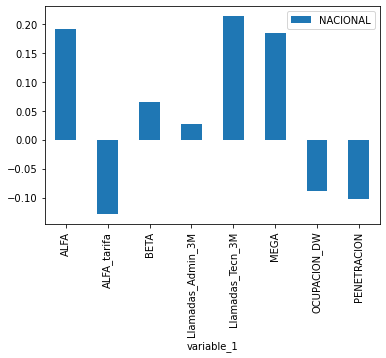

In [34]:
if conGraficos:
    RV_nal_c0.set_index('variable_1').plot.bar()

In [35]:
DataSetEntregable_totales=RV_nal_c0.copy()

In [36]:
DataSetEntregable_totales=DataSetEntregable_totales.set_index('variable_1').T

### Correlaciones x Periodo

### Funcion correlaciones por periodo
* Recibe los datos y retorna data framames para graficar

In [37]:
#(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_c0)
res_corr_total_raz_T=dic_corr_mes_ind(data_c0)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [38]:
res_corr_total_raz_T

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
1,0.216552,-0.108306,0.087096,0.087017,0.273298,0.207049,-0.088306,-0.048886
2,0.225491,-0.141868,0.070738,0.06944,0.226426,0.229301,-0.071616,-0.062446
3,0.224134,-0.172479,0.069265,0.092824,0.259325,0.226286,-0.07874,-0.086357
4,0.172293,-0.11861,0.026696,0.077323,0.227873,0.19107,-0.087458,-0.103293
5,0.172977,-0.120727,0.054392,0.058568,0.196985,0.167067,-0.105757,-0.129675
6,0.203133,-0.150895,0.076416,0.099822,0.203636,0.181817,-0.093439,-0.131629
7,0.157433,-0.111945,0.027144,0.048355,0.197601,0.173036,-0.074168,-0.130821
8,0.210958,-0.147187,0.052826,0.069594,0.184894,0.215281,-0.073878,-0.103341
9,0.176877,-0.077324,0.015309,0.088164,0.211598,0.181433,-0.13294,-0.094834
10,0.17385,-0.049455,-0.01393,0.071449,0.201567,0.200988,-0.07192,-0.09447


In [39]:
DataSetEntregable_totales_temp=res_corr_total_raz_T.copy()

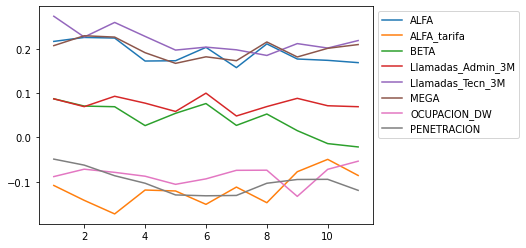

In [40]:
if conGraficos:
    ax = res_corr_total_raz_T.plot.line()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

### Analisis Específicos

In [41]:
#data=data_c0.merge(maestro_data, left_on=['COD_NODO'], right_on=['COD_NODO'], how='left')
data=data_c0.copy()

In [42]:
data.groupby('DIVISION')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False)

,CANT_USER
DIVISION,
REGION CENTRO,4256859.0
REGION OCCIDENTE,2502959.0
REGION NOROCCIDENTE,1934768.0
REGION ORIENTE,1539358.0
REGION COSTA,666985.0


In [43]:
data.groupby('CIUDAD')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False).head(6)

,CANT_USER
CIUDAD,
BOGOTA,3887450.0
CALI,959616.0
MEDELLIN,563295.0
PALMIRA,335306.0
PEREIRA,270671.0
TULUA,241533.0


In [44]:
data[data['CIUDAD']=='BOGOTA'].groupby('AREA')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False).head(10)

,CANT_USER
AREA,
BOGOTA NORTE,1056408.0
BOGOTA OCCIDENTE,1032231.0
BOGOTA SUR,934054.0
BOGOTA ORIENTE,864757.0


### Analisis regionales

In [45]:
regionales=data['DIVISION'].unique()
regionales = [x for x in regionales if pd.notnull(x)]
regionales

['REGION NOROCCIDENTE',
 'REGION CENTRO',
 'REGION OCCIDENTE',
 'REGION COSTA',
 'REGION ORIENTE']

In [46]:
dic_resultados={}

In [47]:
for reg in regionales:
    print(reg)
    dic_aux={}
    data_aux=data[data['DIVISION']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    dic_aux['total']=corr_tab_bajas
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]    
    #dic_aux['razones']=corr_tab_razones
    dic_resultados[reg]=dic_aux

REGION NOROCCIDENTE
REGION CENTRO
REGION OCCIDENTE
REGION COSTA
REGION ORIENTE


In [48]:
#res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in regionales:
    print(reg)
    #aux_tab_var=dic_resultados[reg]['total'][dic_resultados[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados[reg]['total'][dic_resultados[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    #aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    #aux_tab_var.columns=['variable_1',reg]
    aux_tab_sel.columns=['variable_1',reg]
    
    #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

REGION NOROCCIDENTE
REGION CENTRO
REGION OCCIDENTE
REGION COSTA
REGION ORIENTE


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
res_corr_total_raz_nacional

,variable_1,NACIONAL
285,ALFA,0.191375
306,ALFA_tarifa,-0.128222
327,BETA,0.065759
348,Llamadas_Admin_3M,0.027710
369,Llamadas_Tecn_3M,0.213095
390,MEGA,0.184210
411,OCUPACION_DW,-0.087924
432,PENETRACION,-0.101665


In [50]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]

In [51]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.191375,-0.128222,0.065759,0.02771,0.213095,0.18421,-0.087924,-0.101665
REGION NOROCCIDENTE,0.065359,-0.079391,0.020499,0.025868,0.209857,0.068467,-0.040941,-0.041252
REGION CENTRO,0.16855,-0.204869,0.082854,0.002691,0.195063,0.138458,-0.114957,-0.092785
REGION OCCIDENTE,0.243603,-0.06013,0.086554,0.033156,0.212175,0.23392,-0.06986,-0.161698
REGION COSTA,0.225655,-0.147324,0.075704,0.008915,0.24442,0.228128,-0.121375,-0.090961
REGION ORIENTE,0.247814,-0.063563,0.030891,0.061353,0.234612,0.254859,-0.076893,-0.160344


In [52]:
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.191375,-0.128222,0.065759,0.02771,0.213095,0.18421,-0.087924,-0.101665
REGION NOROCCIDENTE,0.065359,-0.079391,0.020499,0.025868,0.209857,0.068467,-0.040941,-0.041252
REGION CENTRO,0.16855,-0.204869,0.082854,0.002691,0.195063,0.138458,-0.114957,-0.092785
REGION OCCIDENTE,0.243603,-0.06013,0.086554,0.033156,0.212175,0.23392,-0.06986,-0.161698
REGION COSTA,0.225655,-0.147324,0.075704,0.008915,0.24442,0.228128,-0.121375,-0.090961
REGION ORIENTE,0.247814,-0.063563,0.030891,0.061353,0.234612,0.254859,-0.076893,-0.160344


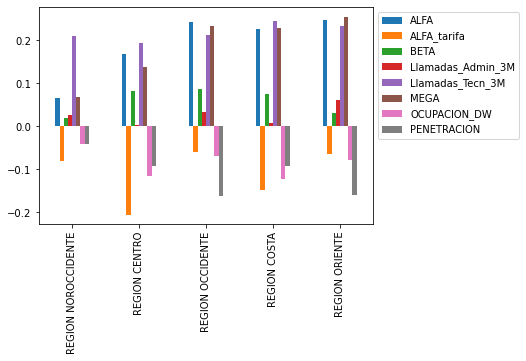

In [53]:
if conGraficos:
    ax = res_corr_total_raz_T[1:].plot.bar()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(30,20));

### Analisis Temporal_ ESPECIFICO

In [54]:
## guardar en tabla
for reg in regionales:
    data_aux=data[data['DIVISION']==reg]    
    #(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
11
1
2
3

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [55]:
DataSetEntregable_totales_temp['CATEGORIA']=DataSetEntregable_totales_temp['CATEGORIA'].fillna('NACIONAL')

In [56]:
DataSetEntregable_totales_temp

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION,CATEGORIA
1,0.216552,-0.108306,0.087096,0.087017,0.273298,0.207049,-0.088306,-0.048886,NACIONAL
2,0.225491,-0.141868,0.070738,0.06944,0.226426,0.229301,-0.071616,-0.062446,NACIONAL
3,0.224134,-0.172479,0.069265,0.092824,0.259325,0.226286,-0.07874,-0.086357,NACIONAL
4,0.172293,-0.11861,0.026696,0.077323,0.227873,0.19107,-0.087458,-0.103293,NACIONAL
5,0.172977,-0.120727,0.054392,0.058568,0.196985,0.167067,-0.105757,-0.129675,NACIONAL
...,...,...,...,...,...,...,...,...,...
7,0.210859,-0.056863,-0.040297,-0.00593,0.285657,0.261821,-0.042512,-0.142599,REGION ORIENTE
8,0.275177,0.025105,0.005725,0.126754,0.181349,0.281157,-0.062602,-0.148962,REGION ORIENTE
9,0.176489,-0.050239,-0.060567,0.177568,0.201295,0.197976,-0.047827,-0.193261,REGION ORIENTE
10,0.268472,0.034872,0.009213,0.136054,0.233413,0.2689,-0.06048,-0.149762,REGION ORIENTE


## Ciudades

In [57]:
ciudades=data.groupby('CIUDAD')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False).head(6).index
ciudades

Index(['BOGOTA', 'CALI', 'MEDELLIN', 'PALMIRA', 'PEREIRA', 'TULUA'], dtype='object', name='CIUDAD')

In [58]:
dic_resultados_ciudad={}

In [59]:
for reg in ciudades:
    print(reg)
    dic_aux={}
    data_aux=data[data['CIUDAD']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    dic_aux['total']=corr_tab_bajas
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    
    #dic_aux['razones']=corr_tab_razones
    dic_resultados_ciudad[reg]=dic_aux

BOGOTA
CALI
MEDELLIN
PALMIRA
PEREIRA
TULUA


In [60]:
#res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in ciudades:
    print(reg)
    #aux_tab_var=dic_resultados_ciudad[reg]['total'][dic_resultados_ciudad[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados_ciudad[reg]['total'][dic_resultados_ciudad[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    #aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    #aux_tab_var.columns=['variable_1',reg+'_r']
    aux_tab_sel.columns=['variable_1',reg]
    
    #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

BOGOTA
CALI
MEDELLIN
PALMIRA
PEREIRA
TULUA


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [61]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]

In [62]:
res_corr_total_raz_T

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.191375,-0.128222,0.065759,0.02771,0.213095,0.18421,-0.087924,-0.101665
BOGOTA,0.155324,-0.204282,0.079442,-0.000888,0.192401,0.124996,-0.125788,-0.090283
CALI,0.269993,-0.067084,0.024886,-0.002635,0.170448,0.303509,-0.099759,-0.157479
MEDELLIN,0.159923,-0.114057,0.100462,0.041359,0.242104,0.118433,-0.102268,-0.171868
PALMIRA,0.155103,0.06731,0.112457,0.053056,0.274042,0.128466,-0.058591,-0.130874
PEREIRA,0.036935,0.107924,-0.007286,0.060168,0.207235,0.045123,0.074967,0.075204
TULUA,0.282531,-0.18554,0.280197,-0.026076,0.309246,0.164417,-0.183724,-0.271305


In [63]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.191375,-0.128222,0.065759,0.02771,0.213095,0.18421,-0.087924,-0.101665
REGION NOROCCIDENTE,0.065359,-0.079391,0.020499,0.025868,0.209857,0.068467,-0.040941,-0.041252
REGION CENTRO,0.16855,-0.204869,0.082854,0.002691,0.195063,0.138458,-0.114957,-0.092785
REGION OCCIDENTE,0.243603,-0.06013,0.086554,0.033156,0.212175,0.23392,-0.06986,-0.161698
REGION COSTA,0.225655,-0.147324,0.075704,0.008915,0.24442,0.228128,-0.121375,-0.090961
REGION ORIENTE,0.247814,-0.063563,0.030891,0.061353,0.234612,0.254859,-0.076893,-0.160344
BOGOTA,0.155324,-0.204282,0.079442,-0.000888,0.192401,0.124996,-0.125788,-0.090283
CALI,0.269993,-0.067084,0.024886,-0.002635,0.170448,0.303509,-0.099759,-0.157479
MEDELLIN,0.159923,-0.114057,0.100462,0.041359,0.242104,0.118433,-0.102268,-0.171868
PALMIRA,0.155103,0.06731,0.112457,0.053056,0.274042,0.128466,-0.058591,-0.130874


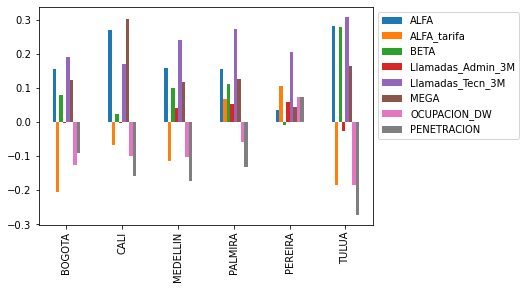

In [64]:
if conGraficos:
    ax = res_corr_total_raz_T[1:].plot.bar()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot()

### Analisis temporal

In [65]:
## guardar en tabla
for reg in ciudades:
    data_aux=data[data['CIUDAD']==reg]      
    #(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [66]:
DataSetEntregable_totales_temp

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION,CATEGORIA
1,0.216552,-0.108306,0.087096,0.087017,0.273298,0.207049,-0.088306,-0.048886,NACIONAL
2,0.225491,-0.141868,0.070738,0.06944,0.226426,0.229301,-0.071616,-0.062446,NACIONAL
3,0.224134,-0.172479,0.069265,0.092824,0.259325,0.226286,-0.07874,-0.086357,NACIONAL
4,0.172293,-0.11861,0.026696,0.077323,0.227873,0.19107,-0.087458,-0.103293,NACIONAL
5,0.172977,-0.120727,0.054392,0.058568,0.196985,0.167067,-0.105757,-0.129675,NACIONAL
...,...,...,...,...,...,...,...,...,...
7,0.339761,-0.246958,0.291734,-0.061634,0.447604,0.209042,-0.058615,-0.433286,TULUA
8,0.446142,-0.233308,-0.008341,-0.140988,0.405504,0.407937,0.141051,-0.240025,TULUA
9,0.164843,-0.267396,0.483696,0.179697,0.25318,0.049724,-0.209144,-0.206587,TULUA
10,0.498709,-0.061761,0.061761,0.007049,0.072585,0.433625,-0.429787,-0.345138,TULUA


### Bogotá

In [67]:
sectoresBog=data[data['CIUDAD']=='BOGOTA']['AREA'].unique()

In [68]:
dic_resultados_Bogota={}

In [69]:
for reg in sectoresBog:
    print(reg)
    dic_aux={}
    data_aux=data[data['AREA']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    dic_aux['total']=corr_tab_bajas
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    
    #dic_aux['razones']=corr_tab_razones
    dic_resultados_Bogota[reg]=dic_aux

BOGOTA SUR
BOGOTA ORIENTE
BOGOTA NORTE
BOGOTA OCCIDENTE


In [70]:
#res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in sectoresBog:
    print(reg)
    #aux_tab_var=dic_resultados_Bogota[reg]['total'][dic_resultados_Bogota[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados_Bogota[reg]['total'][dic_resultados_Bogota[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    #aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    #aux_tab_var.columns=['variable_1',reg+'_r']
    aux_tab_sel.columns=['variable_1',reg]
    
    #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

BOGOTA SUR
BOGOTA ORIENTE
BOGOTA NORTE
BOGOTA OCCIDENTE


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


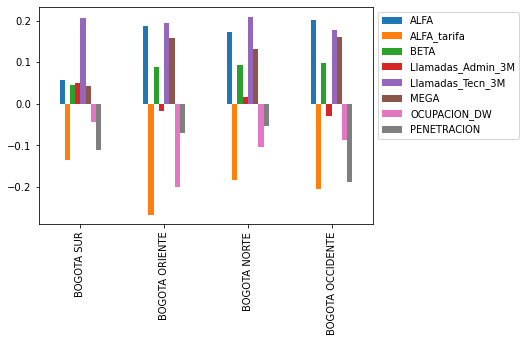

In [71]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]
if conGraficos:    
    ax = res_corr_total_raz_T[1:].plot.bar()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot()

In [72]:
res_corr_total_raz_T[1:]

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
BOGOTA SUR,0.05837,-0.135335,0.044744,0.05003,0.206331,0.043746,-0.043927,-0.11229
BOGOTA ORIENTE,0.187779,-0.266526,0.088421,-0.016946,0.194262,0.15942,-0.200692,-0.070883
BOGOTA NORTE,0.172524,-0.18262,0.093128,0.017303,0.209125,0.131879,-0.103592,-0.053141
BOGOTA OCCIDENTE,0.200797,-0.204301,0.098167,-0.029976,0.176451,0.160956,-0.087187,-0.189411


In [73]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.191375,-0.128222,0.065759,0.02771,0.213095,0.18421,-0.087924,-0.101665
REGION NOROCCIDENTE,0.065359,-0.079391,0.020499,0.025868,0.209857,0.068467,-0.040941,-0.041252
REGION CENTRO,0.16855,-0.204869,0.082854,0.002691,0.195063,0.138458,-0.114957,-0.092785
REGION OCCIDENTE,0.243603,-0.06013,0.086554,0.033156,0.212175,0.23392,-0.06986,-0.161698
REGION COSTA,0.225655,-0.147324,0.075704,0.008915,0.24442,0.228128,-0.121375,-0.090961
REGION ORIENTE,0.247814,-0.063563,0.030891,0.061353,0.234612,0.254859,-0.076893,-0.160344
BOGOTA,0.155324,-0.204282,0.079442,-0.000888,0.192401,0.124996,-0.125788,-0.090283
CALI,0.269993,-0.067084,0.024886,-0.002635,0.170448,0.303509,-0.099759,-0.157479
MEDELLIN,0.159923,-0.114057,0.100462,0.041359,0.242104,0.118433,-0.102268,-0.171868
PALMIRA,0.155103,0.06731,0.112457,0.053056,0.274042,0.128466,-0.058591,-0.130874


### Resultado Atemporal

In [74]:
### Guardar Archivo
##DataSetEntregable_totales.to_csv('CorrelacionesAgrupadas_14Dic.csv',sep=';')

### Temporales

In [75]:
## guardar en tabla
for reg in sectoresBog:
    data_aux=data[data['AREA']==reg]      
    #(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Resulado Temporal

In [76]:
#DataSetEntregable_totales_temp.to_csv('CorrelacionesTemporales_14Dic.csv',sep=';')

# Regresión multilineal

* Reescalado
* Modelos

In [77]:
DataSetEntregable_totales_reg=pd.DataFrame()
DataSetEntregable_totales_temp_reg=pd.DataFrame()

In [78]:
data_reg=data_c0.copy()

In [79]:
sel_variables_causas2

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'PENETRACION',
 'OCUPACION_DW']

In [80]:
data_reg.set_index('COD_NODO',inplace=True)

In [81]:
data_reg=data_reg[sel_variables_causas2+['ind_churn','FECHA']]

In [82]:
data_reg.isnull().sum()/len(data_reg)

ALFA_tarifa          0.255073
ALFA                 0.008670
BETA                 0.004775
MEGA                 0.008450
Llamadas_Admin_3M    0.000031
Llamadas_Tecn_3M     0.000031
PENETRACION          0.000000
OCUPACION_DW         0.001633
ind_churn            0.000000
FECHA                0.000000
dtype: float64

In [83]:
data_reg=data_reg.dropna()

In [84]:
colums_reg=list(data_reg.columns)

In [85]:
colums_reg.remove('FECHA')

In [86]:
colums_reg

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'PENETRACION',
 'OCUPACION_DW',
 'ind_churn']

In [87]:
#for col in colums_reg:
#    data_reg[col]=np.log1p(data_reg[col])

In [88]:
## Escalar
#cols=data_reg.columns
scaler = MinMaxScaler()
data_reg[colums_reg]= scaler.fit_transform(data_reg[colums_reg])

In [89]:
colums_reg.remove('ind_churn')

In [90]:
colums_reg

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'PENETRACION',
 'OCUPACION_DW']

### Seleccion Variables Significativas

In [91]:
reg_nal=iter_regresion(data_reg)
reg_nal

1
      coefs       pvalues           Features    VIF
0 -0.024282  1.848694e-27        ALFA_tarifa  12.05
1  0.019992  4.552527e-02               ALFA  98.72
2  0.003056  6.798582e-01               BETA  44.81
3  0.024393  3.009205e-03               MEGA  77.26
4 -0.002833  2.820620e-01  Llamadas_Admin_3M  20.91
5  0.027598  4.013677e-62   Llamadas_Tecn_3M   2.11
6 -0.042034  6.418673e-86        PENETRACION  10.11
7 -0.027596  4.888920e-30       OCUPACION_DW  19.18
      coefs   pvalues Features    VIF
2  0.003056  0.679858     BETA  44.81
2
      coefs       pvalues           Features    VIF
0 -0.024289  1.768669e-27        ALFA_tarifa  10.32
1  0.023882  7.913760e-13               ALFA  17.58
2  0.021253  8.318668e-12               MEGA  21.39
3 -0.002876  2.743712e-01  Llamadas_Admin_3M  18.53
4  0.027600  3.917880e-62   Llamadas_Tecn_3M   2.11
5 -0.042046  5.505966e-86        PENETRACION   9.24
6 -0.027624  4.065650e-30       OCUPACION_DW  17.06
      coefs   pvalues           Feat

,coefs,pvalues,Features,VIF
0,-0.024380,1.047228e-27,ALFA_tarifa,9.06
1,0.024075,4.800902e-13,ALFA,17.51
2,0.021073,1.162781e-11,MEGA,21.19
3,0.027056,1.650123e-65,Llamadas_Tecn_3M,1.91
4,-0.042109,2.703095e-86,PENETRACION,8.60
5,-0.027766,1.707798e-30,OCUPACION_DW,15.11


In [92]:
colums_reg=list(reg_nal['Features'])
colums_reg

['ALFA_tarifa',
 'ALFA',
 'MEGA',
 'Llamadas_Tecn_3M',
 'PENETRACION',
 'OCUPACION_DW']

### Nacional

In [93]:
# Dividir en X y X
y_train = data_reg['ind_churn']
X_train =  data_reg[colums_reg]

In [94]:
#Modelos
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ind_churn   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     323.1
Date:                Fri, 24 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:00:24   Log-Likelihood:                 35667.
No. Observations:               23499   AIC:                        -7.132e+04
Df Residuals:                   23492   BIC:                        -7.126e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1129      0.003     43.444      0.000       0.108       0.118
ALFA_tarifa         -0.0244      0.002    -10.923      0.000      -0.029      -0.020
ALFA                 0.0241      0.003      7.235      0.000       0.018       0.031
MEGA                 0.0211      0.003      6.788      0.000       0.015       0.027
Llamadas_Tecn_3M     0.0271      0.002     17.147      0.000       0.024       0.030
PENETRACION         -0.0421      0.002    -19.770      0.000      -0.046      -0.038
OCUPACION_DW        -0.0278      0.002    -11.494      0.000      -0.033      -0.023
==============================================================================
Omnibus:                    13586.067   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           284480.170
Skew:                           2.368   Prob(JB):                         0.00
Kurtosis:                      19.374   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,MEGA,21.19
1,ALFA,17.51
5,OCUPACION_DW,15.11
0,ALFA_tarifa,9.06
4,PENETRACION,8.60
3,Llamadas_Tecn_3M,1.91


In [96]:
df_coef_nal=lr_1.params.to_frame()
df_coef_nal.columns=['coefs']

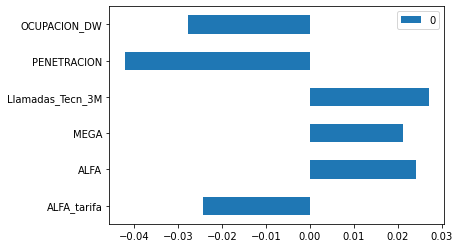

In [97]:
if conGraficos:
    lr_1.params.to_frame()[1:].plot.barh()

In [98]:
df_coef_nal

,coefs
const,0.112867
ALFA_tarifa,-0.024380
ALFA,0.024075
MEGA,0.021073
Llamadas_Tecn_3M,0.027056
PENETRACION,-0.042109
OCUPACION_DW,-0.027766


In [99]:
df_vif_nal=vif

In [100]:
DataSetEntregable_totales_reg=df_coef_nal.copy()

In [101]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg[1:].T
DataSetEntregable_totales_reg

,ALFA_tarifa,ALFA,MEGA,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
coefs,-0.02438,0.024075,0.021073,0.027056,-0.042109,-0.027766


In [102]:
DataSetEntregable_totales_reg['index']='NACIONAL'
DataSetEntregable_totales_reg.set_index('index',inplace=True)
DataSetEntregable_totales_reg

,ALFA_tarifa,ALFA,MEGA,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
index,,,,,,
NACIONAL,-0.02438,0.024075,0.021073,0.027056,-0.042109,-0.027766


## Regresión en el tiempo

In [103]:
data_reg

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,ind_churn,FECHA
COD_NODO,,,,,,,,,,
0AR,0.823489,0.371914,0.476646,0.401453,0.657478,0.312486,0.591219,0.818679,0.085651,1
0BZ,0.512437,0.274250,0.377351,0.361104,0.828574,0.269577,0.454518,0.829593,0.113535,1
0DB,0.588923,0.309359,0.372436,0.411845,0.794122,0.133418,0.393267,0.852645,0.122944,1
0DD,0.614580,0.344682,0.370740,0.460471,0.664632,0.269577,0.440474,0.739416,0.023085,1
0SM,0.739400,0.220434,0.283311,0.366737,1.000000,0.269577,0.365556,0.669957,0.057959,1
...,...,...,...,...,...,...,...,...,...,...
ZR23B,0.523526,0.586943,0.391398,0.754978,0.739633,0.000000,0.202826,0.474937,0.103884,11
ZT1,0.378818,0.313235,0.363127,0.425639,0.660674,0.244485,0.270097,0.635178,0.137591,11
ZT2,0.341633,0.471728,0.507817,0.488972,0.540476,0.223707,0.370130,0.867192,0.072057,11


In [104]:
(df_coef, df_vif)=dic_reg_mes_ind(data_reg)

1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [105]:
df_coef

,coefs,1,2,3,4,5,6,7,8,9,10,11
const,0.112867,0.092807,0.081095,0.113241,0.097838,0.122642,0.131771,0.118688,0.120236,0.113230,0.109381,0.087949
ALFA_tarifa,-0.024380,-0.011573,-0.023421,-0.034058,-0.017071,-0.026541,-0.033939,-0.021778,-0.025180,-0.001099,-0.000896,-0.014273
ALFA,0.024075,0.023698,0.030050,0.046118,0.003116,0.013376,0.024621,0.023926,0.010156,0.018956,-0.010775,-0.006015
MEGA,0.021073,0.034342,0.026622,0.001462,0.053828,0.029216,0.013792,0.019331,0.042820,0.026875,0.049652,0.053582
Llamadas_Tecn_3M,0.027056,0.030936,0.022799,0.027308,0.026935,0.026884,0.030029,0.028403,0.018776,0.028032,0.034827,0.031216
PENETRACION,-0.042109,-0.038872,-0.029087,-0.042993,-0.047327,-0.049266,-0.057460,-0.050471,-0.046687,-0.028334,-0.029832,-0.037658
OCUPACION_DW,-0.027766,-0.024561,-0.013136,-0.026332,-0.022862,-0.038962,-0.035753,-0.022780,-0.024561,-0.049372,-0.036908,-0.010387


In [106]:
df_coef_T=df_coef.T
df_coef_T.pop('const')
df_coef_T=df_coef_T[1:]
df_coef_T

,ALFA_tarifa,ALFA,MEGA,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
1,-0.011573,0.023698,0.034342,0.030936,-0.038872,-0.024561
2,-0.023421,0.030050,0.026622,0.022799,-0.029087,-0.013136
3,-0.034058,0.046118,0.001462,0.027308,-0.042993,-0.026332
4,-0.017071,0.003116,0.053828,0.026935,-0.047327,-0.022862
5,-0.026541,0.013376,0.029216,0.026884,-0.049266,-0.038962
6,-0.033939,0.024621,0.013792,0.030029,-0.057460,-0.035753
7,-0.021778,0.023926,0.019331,0.028403,-0.050471,-0.022780
8,-0.025180,0.010156,0.042820,0.018776,-0.046687,-0.024561
9,-0.001099,0.018956,0.026875,0.028032,-0.028334,-0.049372
10,-0.000896,-0.010775,0.049652,0.034827,-0.029832,-0.036908


In [107]:
DataSetEntregable_totales_temp_reg=df_coef_T.copy()

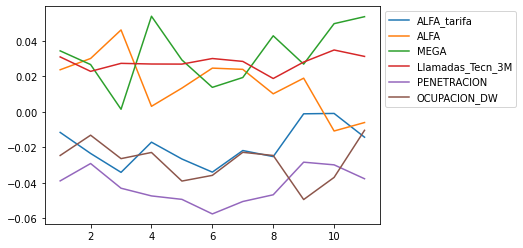

In [108]:
if conGraficos:
    ax = df_coef_T.plot.line()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

## Analisis Específicos

In [109]:
data_reg

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,ind_churn,FECHA
COD_NODO,,,,,,,,,,
0AR,0.823489,0.371914,0.476646,0.401453,0.657478,0.312486,0.591219,0.818679,0.085651,1
0BZ,0.512437,0.274250,0.377351,0.361104,0.828574,0.269577,0.454518,0.829593,0.113535,1
0DB,0.588923,0.309359,0.372436,0.411845,0.794122,0.133418,0.393267,0.852645,0.122944,1
0DD,0.614580,0.344682,0.370740,0.460471,0.664632,0.269577,0.440474,0.739416,0.023085,1
0SM,0.739400,0.220434,0.283311,0.366737,1.000000,0.269577,0.365556,0.669957,0.057959,1
...,...,...,...,...,...,...,...,...,...,...
ZR23B,0.523526,0.586943,0.391398,0.754978,0.739633,0.000000,0.202826,0.474937,0.103884,11
ZT1,0.378818,0.313235,0.363127,0.425639,0.660674,0.244485,0.270097,0.635178,0.137591,11
ZT2,0.341633,0.471728,0.507817,0.488972,0.540476,0.223707,0.370130,0.867192,0.072057,11


In [110]:
data_reg_nor=data_reg.copy()

In [111]:
data_reg_nor=data_reg_nor.merge(maestro_data, left_index=True, right_on=['COD_NODO'], how='left')
data_reg_nor.set_index('COD_NODO', inplace=True)

In [112]:
data_reg_nor_temp=data_reg_nor.copy()

In [113]:
data_reg_nor.pop('FECHA')

COD_NODO
0AR       1
0BZ       1
0DB       1
0DD       1
0SM       1
         ..
ZR23B    11
ZT1      11
ZT2      11
ZT3      11
ZVD      11
Name: FECHA, Length: 25443, dtype: int64

## Regional

In [114]:
dic_resultados_reg={}

In [115]:
for reg in regionales:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['DIVISION']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    y_train = data_aux.pop('ind_churn')
    X_train = data_aux[colums_reg]    
    #Modelos
    X_train_lm = sm.add_constant(X_train)
    lr_1 = sm.OLS(y_train, X_train_lm).fit()    
    dic_aux['coef']=lr_1.params.to_frame()
    dic_aux['coef'].columns=['coefs']
    # Cálculo VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    dic_aux['vif']=vif
    dic_resultados[reg]=dic_aux

REGION NOROCCIDENTE
REGION CENTRO
REGION OCCIDENTE
REGION COSTA
REGION ORIENTE


In [116]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in regionales:
    print(reg)
    
    aux_tab_coef=dic_resultados[reg]['coef']
    aux_tab_vif=dic_resultados[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

REGION NOROCCIDENTE
REGION CENTRO
REGION OCCIDENTE
REGION COSTA
REGION ORIENTE


In [117]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])

In [118]:
df_coef_T

,ALFA_tarifa,ALFA,MEGA,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
coefs,-0.024380,0.024075,0.021073,0.027056,-0.042109,-0.027766
REGION NOROCCIDENTE,-0.019705,0.039254,0.031419,0.025318,-0.019663,-0.021243
REGION CENTRO,-0.057623,0.025099,-0.003955,0.029942,-0.033697,-0.033260
REGION OCCIDENTE,0.003967,0.027702,0.051843,0.028717,-0.068476,-0.012181
REGION COSTA,-0.021762,0.010548,0.039412,0.031098,-0.032001,-0.035452
REGION ORIENTE,-0.002800,0.027445,0.012378,0.029949,-0.056545,-0.011180


In [119]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

,ALFA_tarifa,ALFA,MEGA,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
NACIONAL,-0.024380,0.024075,0.021073,0.027056,-0.042109,-0.027766
REGION NOROCCIDENTE,-0.019705,0.039254,0.031419,0.025318,-0.019663,-0.021243
REGION CENTRO,-0.057623,0.025099,-0.003955,0.029942,-0.033697,-0.033260
REGION OCCIDENTE,0.003967,0.027702,0.051843,0.028717,-0.068476,-0.012181
REGION COSTA,-0.021762,0.010548,0.039412,0.031098,-0.032001,-0.035452
REGION ORIENTE,-0.002800,0.027445,0.012378,0.029949,-0.056545,-0.011180


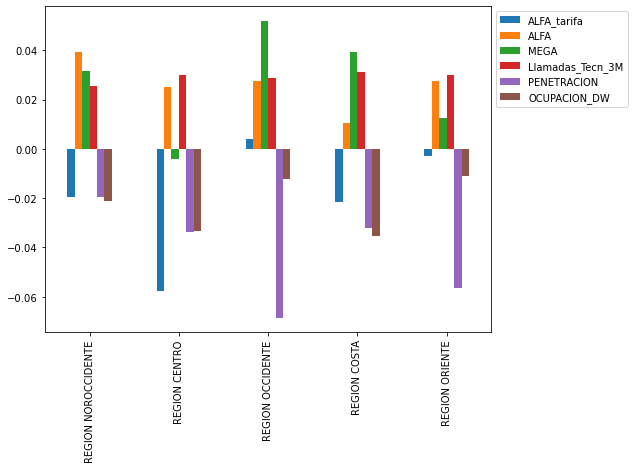

In [120]:
if conGraficos:
    ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

####  Analisis temporal

In [121]:
for reg in regionales:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['DIVISION']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)    

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11
1
2
3

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a


4
5
6
7
8
9
10
11
1
2
3

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a


4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [122]:
DataSetEntregable_totales_temp_reg['CATEGORIA']=DataSetEntregable_totales_temp_reg['CATEGORIA'].fillna('NACIONAL')

In [123]:
DataSetEntregable_totales_temp_reg

,ALFA_tarifa,ALFA,MEGA,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,CATEGORIA
1,-0.011573,0.023698,0.034342,0.030936,-0.038872,-0.024561,NACIONAL
2,-0.023421,0.030050,0.026622,0.022799,-0.029087,-0.013136,NACIONAL
3,-0.034058,0.046118,0.001462,0.027308,-0.042993,-0.026332,NACIONAL
4,-0.017071,0.003116,0.053828,0.026935,-0.047327,-0.022862,NACIONAL
5,-0.026541,0.013376,0.029216,0.026884,-0.049266,-0.038962,NACIONAL
...,...,...,...,...,...,...,...
7,-0.002879,-0.002619,0.064375,0.064616,-0.015935,-0.012904,REGION ORIENTE
8,0.047403,0.040322,0.023030,0.024959,-0.067848,-0.026378,REGION ORIENTE
9,-0.004330,0.017200,0.020573,0.000704,-0.068547,0.038090,REGION ORIENTE
10,0.048196,0.052914,-0.015716,0.016098,-0.027998,-0.003534,REGION ORIENTE


## Ciudades

In [124]:
dic_resultados_ciudad_reg={}
for reg in ciudades:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['CIUDAD']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    if len(data_aux)>0:
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]   

        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados_ciudad_reg[reg]=dic_aux

BOGOTA
CALI
MEDELLIN
PALMIRA
PEREIRA
TULUA


In [125]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in dic_resultados_ciudad_reg:
    print(reg)    
    aux_tab_coef=dic_resultados_ciudad_reg[reg]['coef']
    aux_tab_vif=dic_resultados_ciudad_reg[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

BOGOTA
CALI
MEDELLIN
PALMIRA
PEREIRA
TULUA


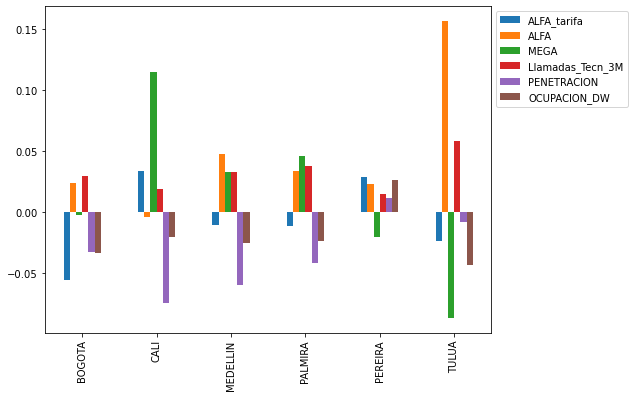

In [126]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])
if conGraficos:
    ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

In [127]:
df_coef_T[1:]

,ALFA_tarifa,ALFA,MEGA,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
BOGOTA,-0.055532,0.023982,-0.002651,0.029543,-0.032765,-0.033777
CALI,0.033486,-0.004219,0.114501,0.018711,-0.074208,-0.020686
MEDELLIN,-0.010739,0.047186,0.033183,0.032908,-0.059824,-0.025593
PALMIRA,-0.011298,0.033250,0.045773,0.037996,-0.041971,-0.024185
PEREIRA,0.028560,0.022796,-0.020810,0.014983,0.011247,0.026417
TULUA,-0.023372,0.156376,-0.086669,0.058539,-0.008604,-0.043677


In [128]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

,ALFA_tarifa,ALFA,MEGA,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
NACIONAL,-0.024380,0.024075,0.021073,0.027056,-0.042109,-0.027766
REGION NOROCCIDENTE,-0.019705,0.039254,0.031419,0.025318,-0.019663,-0.021243
REGION CENTRO,-0.057623,0.025099,-0.003955,0.029942,-0.033697,-0.033260
REGION OCCIDENTE,0.003967,0.027702,0.051843,0.028717,-0.068476,-0.012181
REGION COSTA,-0.021762,0.010548,0.039412,0.031098,-0.032001,-0.035452
REGION ORIENTE,-0.002800,0.027445,0.012378,0.029949,-0.056545,-0.011180
BOGOTA,-0.055532,0.023982,-0.002651,0.029543,-0.032765,-0.033777
CALI,0.033486,-0.004219,0.114501,0.018711,-0.074208,-0.020686
MEDELLIN,-0.010739,0.047186,0.033183,0.032908,-0.059824,-0.025593
PALMIRA,-0.011298,0.033250,0.045773,0.037996,-0.041971,-0.024185


#### Analisis temporal

In [129]:
for reg in ciudades:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['CIUDAD']==reg]
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a


11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [130]:
DataSetEntregable_totales_temp_reg

,ALFA_tarifa,ALFA,MEGA,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,CATEGORIA
1,-0.011573,0.023698,0.034342,0.030936,-0.038872,-0.024561,NACIONAL
2,-0.023421,0.030050,0.026622,0.022799,-0.029087,-0.013136,NACIONAL
3,-0.034058,0.046118,0.001462,0.027308,-0.042993,-0.026332,NACIONAL
4,-0.017071,0.003116,0.053828,0.026935,-0.047327,-0.022862,NACIONAL
5,-0.026541,0.013376,0.029216,0.026884,-0.049266,-0.038962,NACIONAL
...,...,...,...,...,...,...,...
7,0.016288,0.215188,-0.160924,0.164936,-0.053476,0.070650,TULUA
8,0.037973,0.071663,0.082936,-0.036735,-0.005804,0.093499,TULUA
9,-0.119067,0.150702,-0.144740,0.113023,0.036490,-0.103432,TULUA
10,0.101106,0.016375,0.092875,0.031388,-0.085742,-0.111397,TULUA


## Bogota

In [131]:
dic_resultados_Bogota={}
for reg in sectoresBog:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['AREA']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    if len(data_aux)>0:
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]   

        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados_Bogota[reg]=dic_aux

BOGOTA SUR
BOGOTA ORIENTE
BOGOTA NORTE
BOGOTA OCCIDENTE


In [132]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in dic_resultados_Bogota:
    print(reg)    
    aux_tab_coef=dic_resultados_Bogota[reg]['coef']
    aux_tab_vif=dic_resultados_Bogota[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

BOGOTA SUR
BOGOTA ORIENTE
BOGOTA NORTE
BOGOTA OCCIDENTE


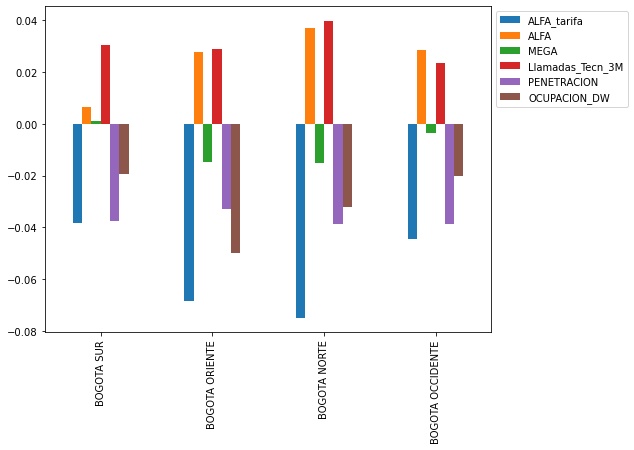

In [133]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])
if conGraficos:
    ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

In [134]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

,ALFA_tarifa,ALFA,MEGA,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
NACIONAL,-0.024380,0.024075,0.021073,0.027056,-0.042109,-0.027766
REGION NOROCCIDENTE,-0.019705,0.039254,0.031419,0.025318,-0.019663,-0.021243
REGION CENTRO,-0.057623,0.025099,-0.003955,0.029942,-0.033697,-0.033260
REGION OCCIDENTE,0.003967,0.027702,0.051843,0.028717,-0.068476,-0.012181
REGION COSTA,-0.021762,0.010548,0.039412,0.031098,-0.032001,-0.035452
REGION ORIENTE,-0.002800,0.027445,0.012378,0.029949,-0.056545,-0.011180
BOGOTA,-0.055532,0.023982,-0.002651,0.029543,-0.032765,-0.033777
CALI,0.033486,-0.004219,0.114501,0.018711,-0.074208,-0.020686
MEDELLIN,-0.010739,0.047186,0.033183,0.032908,-0.059824,-0.025593
PALMIRA,-0.011298,0.033250,0.045773,0.037996,-0.041971,-0.024185


### Analisis Temporal

In [135]:
for reg in sectoresBog:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['AREA']==reg]
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [136]:
DataSetEntregable_totales_temp_reg

,ALFA_tarifa,ALFA,MEGA,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,CATEGORIA
1,-0.011573,0.023698,0.034342,0.030936,-0.038872,-0.024561,NACIONAL
2,-0.023421,0.030050,0.026622,0.022799,-0.029087,-0.013136,NACIONAL
3,-0.034058,0.046118,0.001462,0.027308,-0.042993,-0.026332,NACIONAL
4,-0.017071,0.003116,0.053828,0.026935,-0.047327,-0.022862,NACIONAL
5,-0.026541,0.013376,0.029216,0.026884,-0.049266,-0.038962,NACIONAL
...,...,...,...,...,...,...,...
7,-0.024196,0.047572,-0.042176,0.015786,-0.051974,0.004223,BOGOTA OCCIDENTE
8,-0.045333,0.012187,0.027107,0.021701,-0.027792,-0.022084,BOGOTA OCCIDENTE
9,-0.022601,-0.001549,0.009140,0.019494,-0.053956,-0.071860,BOGOTA OCCIDENTE
10,0.005817,-0.045330,0.090823,0.031945,-0.039947,-0.039962,BOGOTA OCCIDENTE


In [137]:
### Guardar Archivo

In [138]:
#DataSetEntregable_totales_reg.to_csv('RegresionesAgrupadas_14Dic.csv',sep=';')

In [139]:
#DataSetEntregable_totales_temp_reg.to_csv('RegresionesTemporales_14Dic.csv',sep=';')

## Resultados

In [140]:
DataSetEntregable_totales
DataSetEntregable_totales_temp
DataSetEntregable_totales_reg
DataSetEntregable_totales_temp_reg

,ALFA_tarifa,ALFA,MEGA,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,CATEGORIA
1,-0.011573,0.023698,0.034342,0.030936,-0.038872,-0.024561,NACIONAL
2,-0.023421,0.030050,0.026622,0.022799,-0.029087,-0.013136,NACIONAL
3,-0.034058,0.046118,0.001462,0.027308,-0.042993,-0.026332,NACIONAL
4,-0.017071,0.003116,0.053828,0.026935,-0.047327,-0.022862,NACIONAL
5,-0.026541,0.013376,0.029216,0.026884,-0.049266,-0.038962,NACIONAL
...,...,...,...,...,...,...,...
7,-0.024196,0.047572,-0.042176,0.015786,-0.051974,0.004223,BOGOTA OCCIDENTE
8,-0.045333,0.012187,0.027107,0.021701,-0.027792,-0.022084,BOGOTA OCCIDENTE
9,-0.022601,-0.001549,0.009140,0.019494,-0.053956,-0.071860,BOGOTA OCCIDENTE
10,0.005817,-0.045330,0.090823,0.031945,-0.039947,-0.039962,BOGOTA OCCIDENTE
